## **DATA COLLECTION**

**Loading Data**

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Student_Performance.csv')

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## **DATA PREPROCESSING**

**Data Cleaning**

In [6]:
data.isnull()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**Classified into Categorical and Numerical Columns**

In [9]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object':
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
categorical Columns : ['Extracurricular Activities']


**Outlier Detection And Removal**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def boxplot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Before Outlier Removing:  Hours Studied


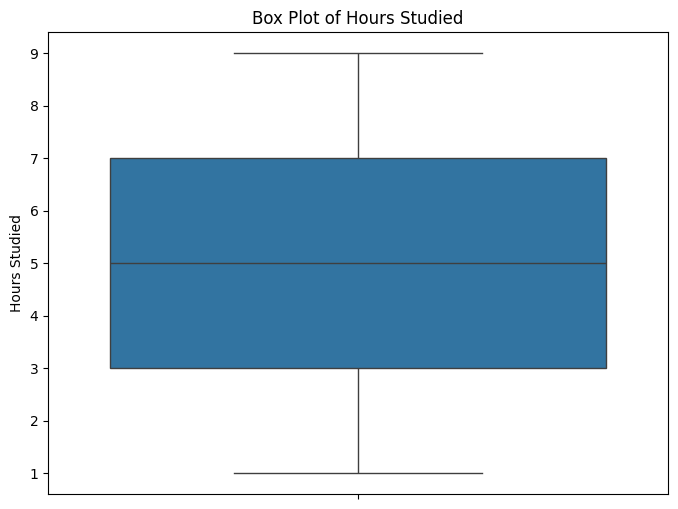

After Outlier Removing:  Hours Studied


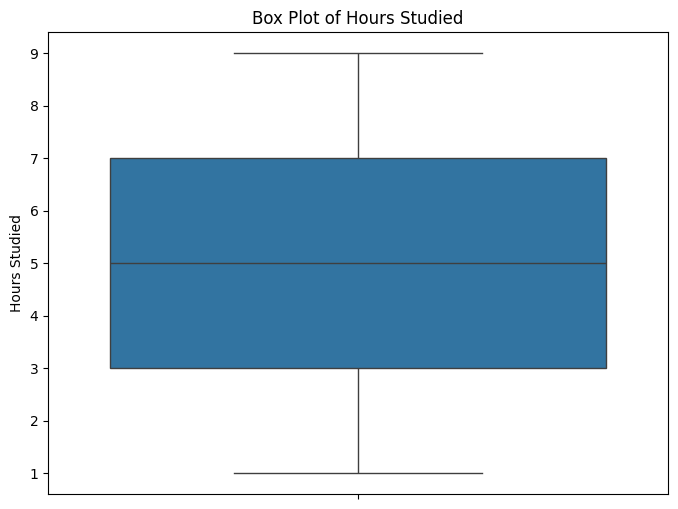

Before Outlier Removing:  Previous Scores


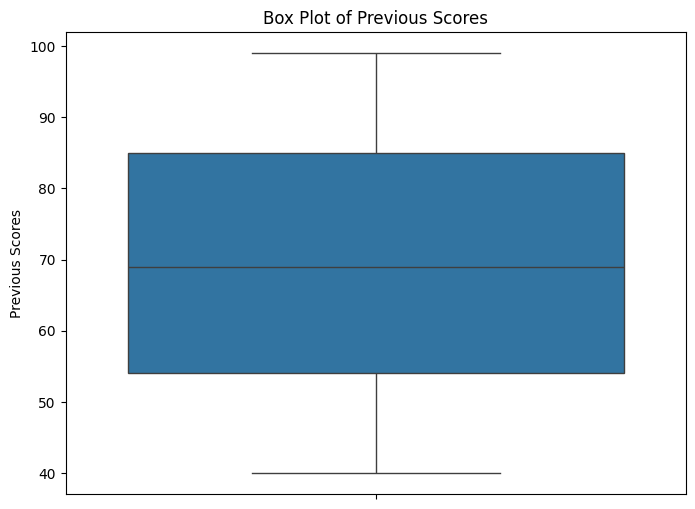

After Outlier Removing:  Previous Scores


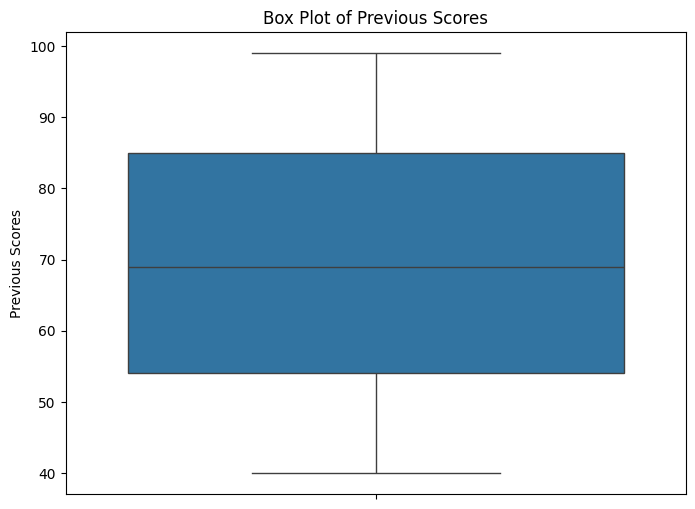

Before Outlier Removing:  Sleep Hours


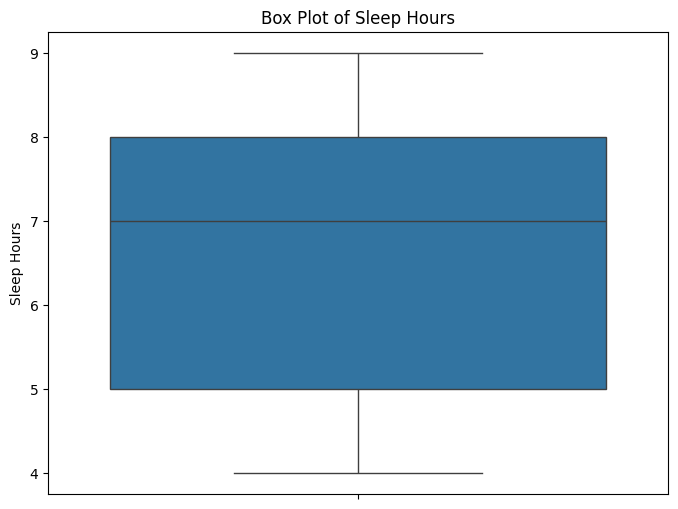

After Outlier Removing:  Sleep Hours


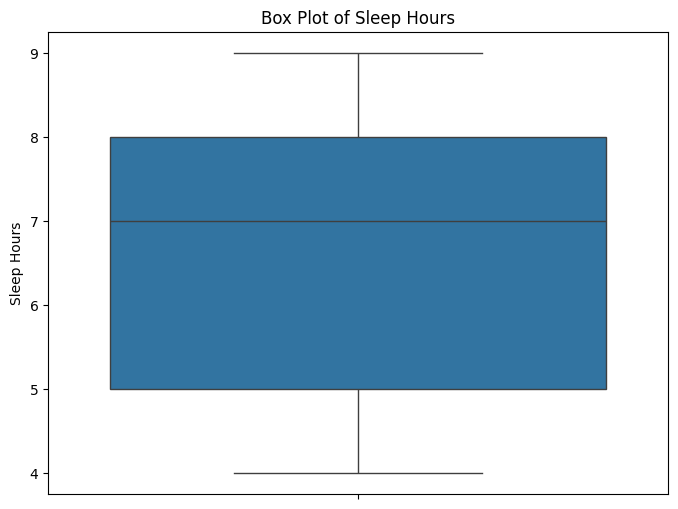

Before Outlier Removing:  Sample Question Papers Practiced


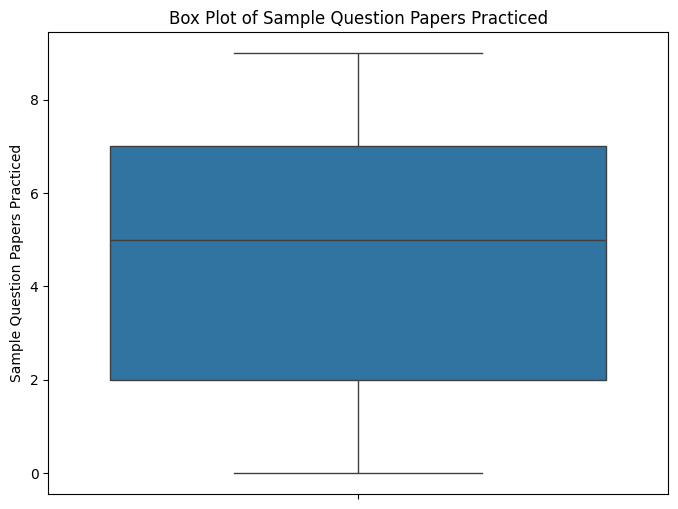

After Outlier Removing:  Sample Question Papers Practiced


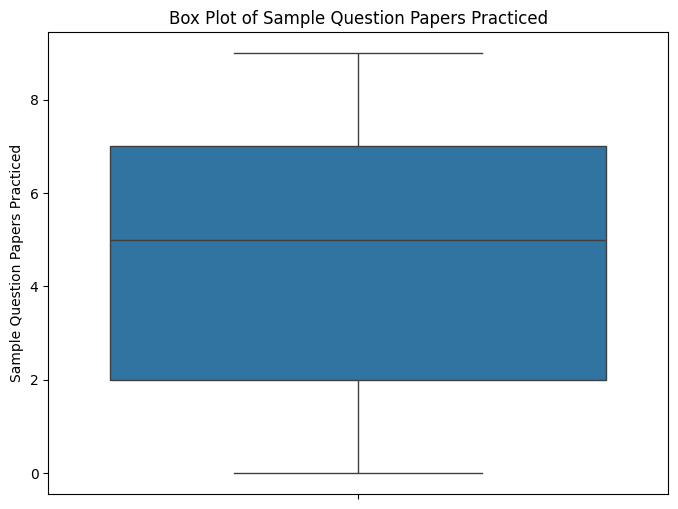

Before Outlier Removing:  Performance Index


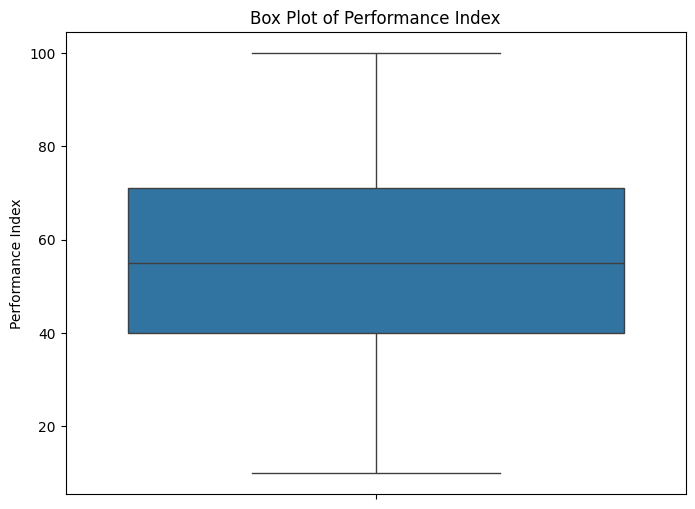

After Outlier Removing:  Performance Index


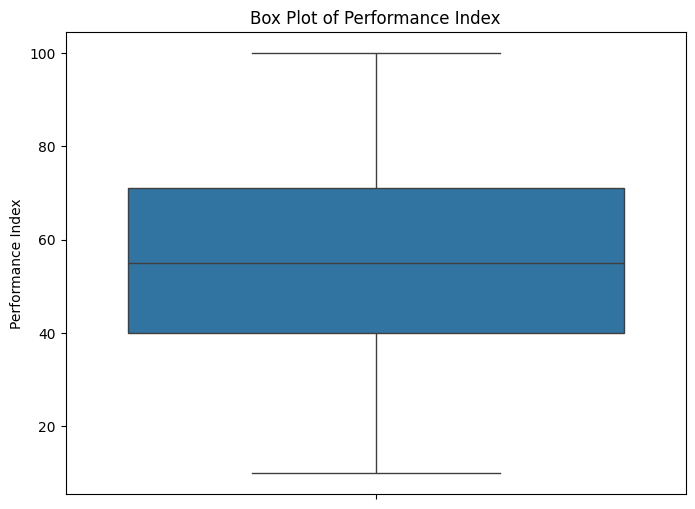

In [12]:
#outlier is removed using iqr method
for column in numerical_columns:

    print("Before Outlier Removing: ",column)

    boxplot(column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data.loc[(data[column] < lower_bound),column] = lower_bound
    data.loc[(data[column] > upper_bound),column] = upper_bound

    boxplot(column)



## **DATA VISUALIZATION**

**Hours Studied vs. Performance Index**

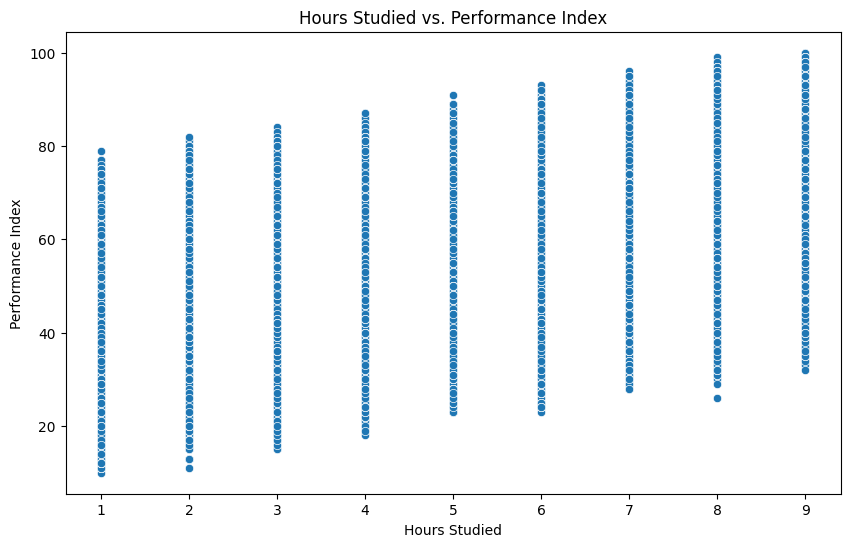

In [13]:
# Hours Studied vs. Performance Index
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Hours Studied', y='Performance Index')
plt.title('Hours Studied vs. Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

**Previous Scores vs. Performance Index**

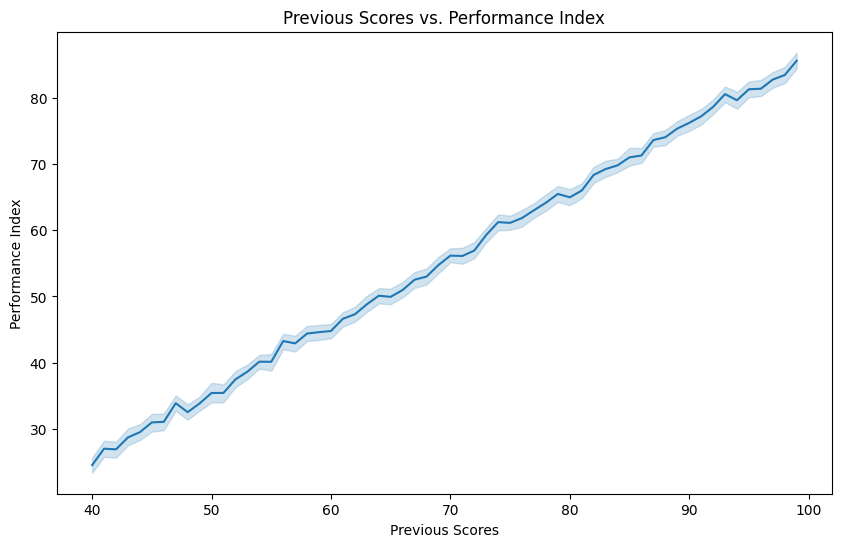

In [18]:
# Previous Scores vs. Performance Index
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Previous Scores', y='Performance Index')
plt.title('Previous Scores vs. Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

**Distribution of Extracurricular Activities**

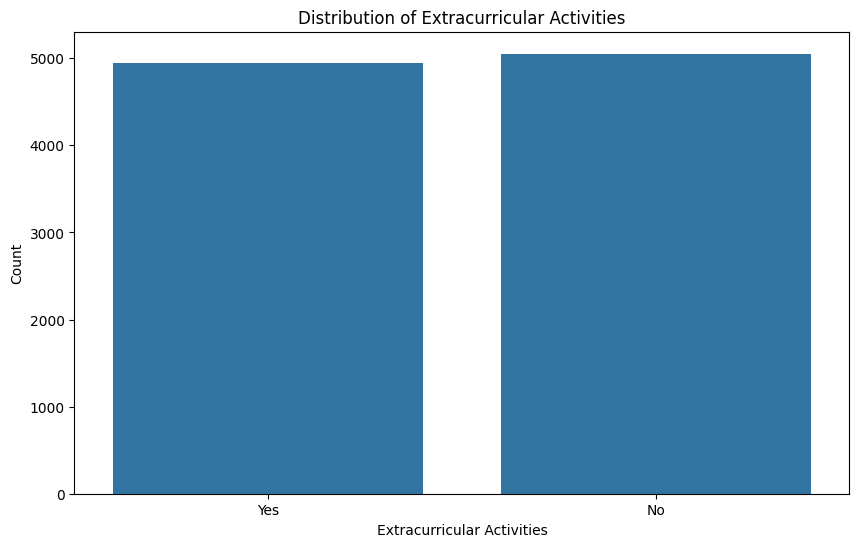

In [19]:
# Distribution of Extracurricular Activities
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Extracurricular Activities')
plt.title('Distribution of Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.show()

**Sleep Hours vs. Performance Index**

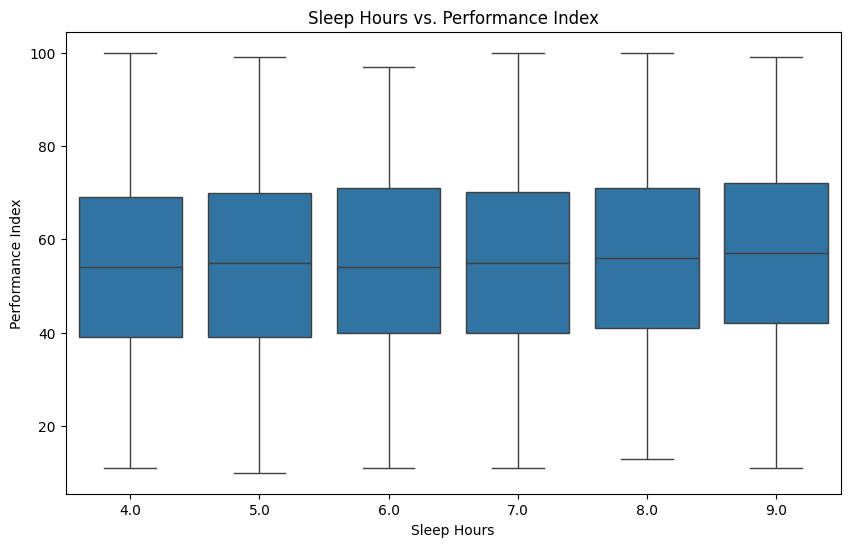

In [21]:
# Sleep Hours vs. Performance Index
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Sleep Hours', y='Performance Index')
plt.title('Sleep Hours vs. Performance Index')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.show()

**Sample Question Papers Practiced vs. Performance Index**

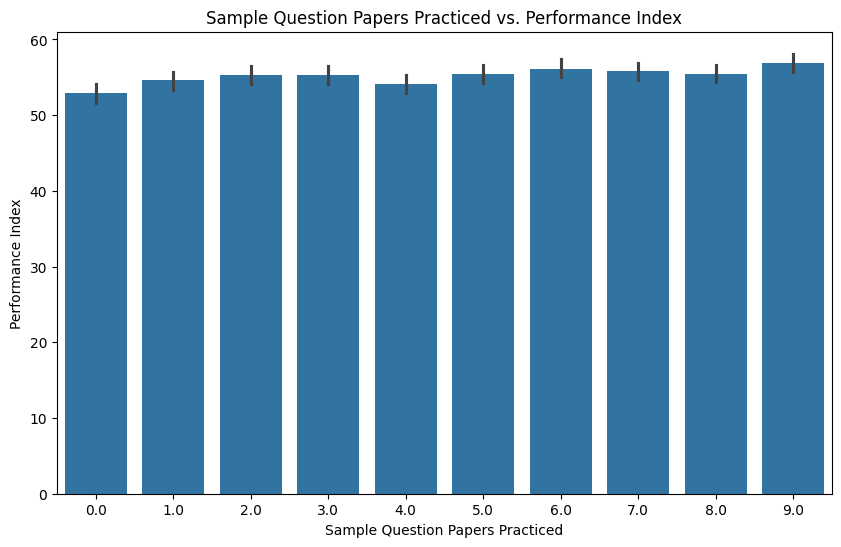

In [24]:
# Sample Question Papers Practiced vs. Performance Index
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Sample Question Papers Practiced', y='Performance Index')
plt.title('Sample Question Papers Practiced vs. Performance Index')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

## **FEATURE ENGINEERING**

In [25]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [26]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

In [27]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

Extracurricular Activities


In [28]:
encoding_mapping

{'Extracurricular Activities': {'No': 0, 'Yes': 1}}

In [30]:
# Create a new dictionary with stripped keys for the 'Extracurricular Activities' key
encoding_mapping['Extracurricular Activities'] = {key.strip(): value for key, value in encoding_mapping['Extracurricular Activities'].items()}

In [31]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,1,9.0,1.0,91.0
1,4,82.0,0,4.0,2.0,65.0
2,8,51.0,1,7.0,2.0,45.0
3,5,52.0,1,5.0,2.0,36.0
4,7,75.0,0,8.0,5.0,66.0


## **MODEL SELECTION and MODEL EVALUATION**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Prepare the data for modeling
X = data.drop(['Performance Index'], axis=1)
y = data['Performance Index']

In [34]:
X = scalerx.fit_transform(X)

In [35]:

# Convert the Pandas Series to a NumPy array
y_array = y.values

# Reshape the NumPy array to a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Use the reshaped array for fitting and transforming
y = scalery.fit_transform(y_reshaped)


In [36]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **Linear Regression**

In [37]:
# Initialize the models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test)


In [38]:
y_linear_pred

array([[-0.02669981],
       [-1.69737512],
       [-0.38110602],
       ...,
       [-2.0004261 ],
       [ 0.42258192],
       [-0.48315488]])

In [39]:
# Evaluate the models
mse_lr = mean_squared_error(y_test, y_linear_pred)

r2_lr = r2_score(y_test, y_linear_pred)

# Display the results
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.011061471626806863, R2: 0.9889832909573145


**Predicted vs Actual plot**

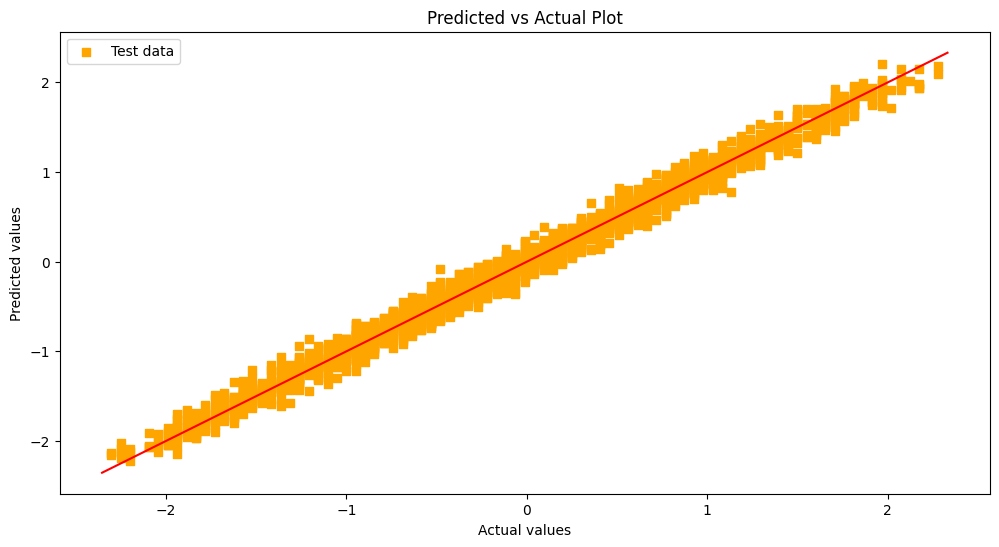

In [40]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

## **NEW PREDICTIONS**

**Testing for New Inputs**

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  float64
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  float64
 4   Sample Question Papers Practiced  10000 non-null  float64
 5   Performance Index                 10000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


In [42]:
def val(column_name, target_key):
    # Accessing the encoding mapping for the specified column
    return encoding_mapping[column_name].get(target_key)


In [43]:
hours = int(input("Hours Studied :"))
prev = int(input("Previous Scores :"))
extra = (input("Extracurricular Activities :(Yes/No)"))
sleep = int(input("Sleep Hours :"))
sample = int(input("Sample Question Papers Practiced :"))

Hours Studied :7
Previous Scores :98
Extracurricular Activities :(Yes/No)Yes
Sleep Hours :8
Sample Question Papers Practiced :5


In [45]:
extra = val('Extracurricular Activities',extra)

In [47]:
import numpy as np

# Given inputs

inputs = np.array([hours,prev,extra,sleep,sample])


In [48]:
new_inputs = scalerx.transform(inputs.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction**

In [50]:
new_pred = linear_model.predict(new_inputs).reshape(-1,1)

In [51]:
n_pred = scalery.inverse_transform(new_pred)

In [53]:
print("Performance Index : ", n_pred[0][0] )

Performance Index :  91.09359055061825
